<a href="https://colab.research.google.com/github/PabloCruzadoG/MachineLearningISIA/blob/main/RB%26BCruzadoSem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objetivo: realizar todos los pasos dentro del proceso de preprocesamiento de datos sobre el conjunto de datos de Hotel Booking. El conjunto de datos contiene información sobre reservas de hotel realizadas en dos hoteles, uno en ciudad y otro un resort.
Cada fila consiste en una reserva del hotel.
Incluye información sobre cuando fue realizada.
La duración de la estadía.
El número de adultos, niños y bebés entre otras cosas.
Este conjunto de datos es ideal para practicar el análisis exploratorio de los datos y los conceptos de limpieza y calidad de los datos.

**Paso 1. Importamos las librerías:**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px
from sklearn.neighbors import LocalOutlierFactor
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler

**Paso 2. Cargamos los datos:**
El conjunto de datos se encuentran en formato CSV (valores separados por comas).
Existen diferentes formas de cargar el conjunto de datos, se puede cargar desde una dirección URL o desde nuestro google drive. (En esta ocación lo subimos desde una hoja de calculo publica de google)

In [ ]:
csv_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQVSTisMrWxaercMtlfhv7vtlmqjusQoWa0SMlG2WHVHr26YGCGr4qb47AiYcZLhwTD87je4kKCDH7C/pub?output=csv"
df = pd.read_csv(csv_path)
df.head()

<ipython-input-3-e48f3b444c45>:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,4.064.749,-7.397.237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,4.075.362,-7.398.377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,4.080.902,-739.419,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,4.068.514,-7.395.976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,4.079.851,-7.394.399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


**Paso 3. Conociendo los datos:**
Para comenzar a conocer los datos podemos utilizar dos métodos que nos ayudaran a obtener un vistazo rápido del conjunto de datos, se utilizan los comandos:

dataframe.shape indica el número de filas y columnas.
dataframe.info indica el número de filas, columnas y el nombre de las columnas, cuenta el número de nulos y muestra de tipo de dato de cada columna y su cantidad.

In [ ]:
df.shape

(102599, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  object 
 8   long                            102591 non-null  object 
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

**Paso 4. Identificar los tipos de datos:**
Exploramos los tipos de datos de cada columna. Así mismo, identificaremos si hay alguna columna que según su significado no coincida con su tipo de dato:

La función dtypes genera una tabla con el tipo de dato de cada columna

In [ ]:
df.dtypes

,0
id,int64
NAME,object
host id,int64
host_identity_verified,object
host name,object
neighbourhood group,object
neighbourhood,object
lat,object
long,object
country,object


Observamos que si hay columnas que según su significado no coincide con su tipo de dato, como por ejemplo, la columna children, presenta como tipo de dato float, sin embargo, debería de ser int. De igual manera con la columna, reservation_status_date, debería de ser datetime64


**Paso 5. Identificar datos faltantes:**
Para identificar los datos faltantes en el conjunto de datos se puede utilizar la función isnull y sumar los valores:

In [ ]:
print(df.isnull().sum())

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

Observamos que la columna company presenta más del 50% de datos faltantes.

**Paso 6. Identificar datos atípicos:**
Para identificar datos atípicos se pueden utilizar distintos métodos, Utilicemos un gráfico de box plot para graficar una de las variables:

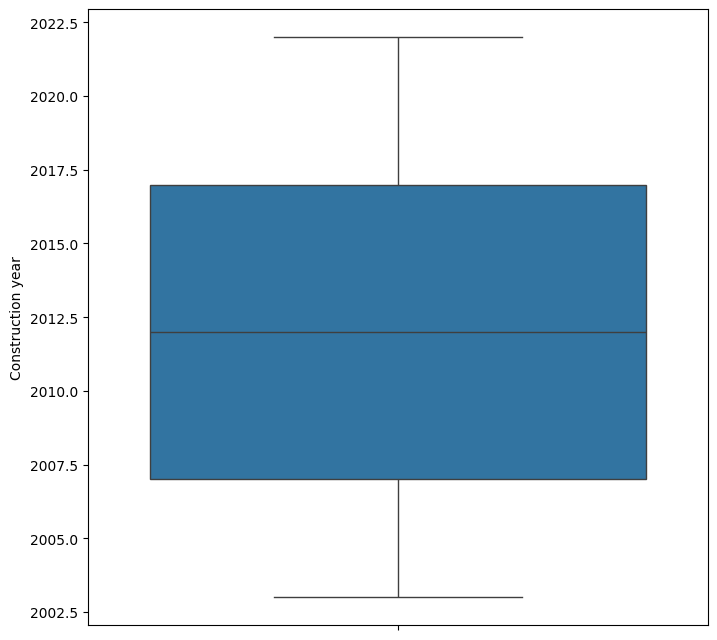

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(y=df["Construction year"])
plt.show()

Observamos que la mayoría de casas construidas de Airbnb han sido entre los
años 2016 y 2007.

<Axes: xlabel='room type', ylabel='Construction year'>

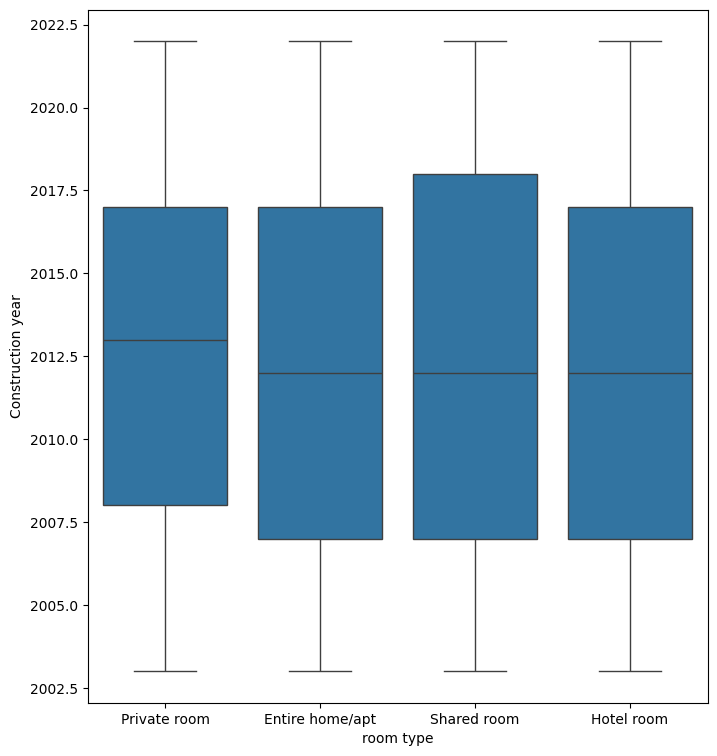

In [ ]:
fig = plt.figure(figsize=(8,9))
sns.boxplot(x="room type", y="Construction year", data=df)

Observamos el tipo de cuarto que se contruyo en cada año en un grafico boxplot.

**Paso 7. Calcular las estadísticas:**
dataframe.describe para visualizar las estadísticas del conjunto de datos. Por defecto, la función describe trabaja con columnas numéricas y no con columnas de tipo object, mostrando los siguientes datos:

*   El número de elementos de la variable
*   La media (Promedio de los valores)
*   La desviación estándar (std)
*   El valor mínimo
*   Los cuartiles (25%, 50% y 75%)
*   El valor máximo

In [ ]:
df.describe()

,id,host id,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


➡️ Ahora visualizamos a las variables categóricas: agregándole include=['object'] (texto) podremos observar solo las columnas que son categóricas (de tipo object):

*   count	- Número de valores no nulos.
*   unique - Cantidad de valores únicos.
*   top	- Valor más frecuente (moda).
*   freq - Frecuencia del valo

In [ ]:
df.describe(include=['object'])

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,price,service fee,last review,house_rules,license
count,102349,102310,102193,102570,102583,102591,102591,102067,102468,102494,102523,102599,102352,102326,86706,50468,2
unique,61279,2,13189,7,224,21991,17774,1,1,2,3,4,1151,231,2477,1969,1
top,Home away from home,unconfirmed,Michael,Manhattan,Bedford-Stuyvesant,4.076.411,-7.399.371,United States,US,False,moderate,Entire home/apt,$206,$41,6/23/2019,#NAME?,41662/AL
freq,33,51200,881,43792,7937,36,44,102067,102468,51474,34343,53701,137,526,2443,2712,2


unique: para saber cuantos valores son únicos, como podemos ver en la columna host_identity_verified hay 2 valores diferentes.
top: para ver el valor que más se repite, el cual es Home away from home.
freq: la frecuencia en que se repide el valor 33.

**Paso 8. Análisis de tendencia central, posición y dispersión:** 🎯
El análisis de la tendencia central, la simetría y la dispersión de los datos es importante para entender cómo se comporta cada variable:

➡️ review rate number: calificacion del 1 al 5 de cada RB&B.

<function matplotlib.pyplot.show(close=None, block=None)>

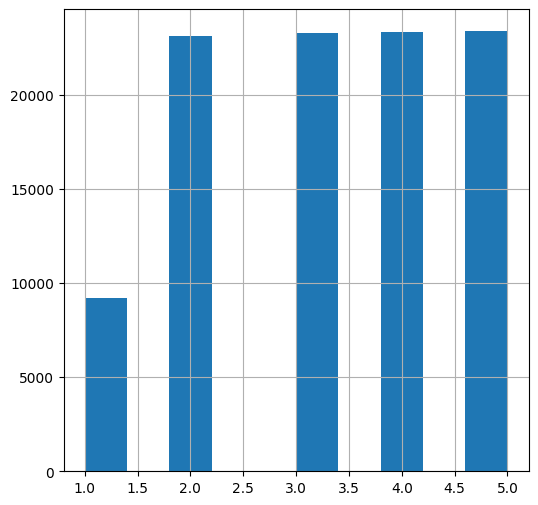

In [ ]:
df['review rate number'].hist(figsize = (6,6))
plt.show

Este gráfico muestra un sesgo positivo hacia la izquierda

In [ ]:
mean = df['review rate number'].mean()
median = df['review rate number'].median()
mode = df['review rate number'].mode()
skew = df['review rate number'].skew()
kurt = df['review rate number'].kurt()

print("La media es:", mean)
print("La mediana es:", median)
print("La moda es:", mode)
print("El sesgo es:", skew)
print("La kurtosis es:", kurt)

La media es: 3.279105922384207
La mediana es: 3.0
La moda es: 0    5.0
Name: review rate number, dtype: float64
El sesgo es: -0.13864825674609896
La kurtosis es: -1.1268049875184862


➡️ Construction year: año de construcción.

<function matplotlib.pyplot.show(close=None, block=None)>

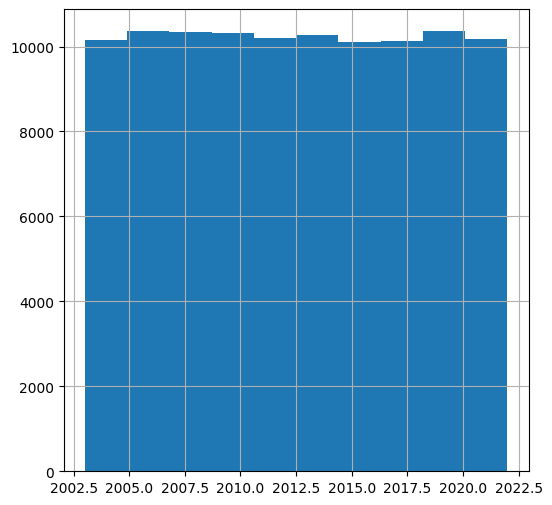

In [ ]:
df['Construction year'].hist(figsize = (6,6))
plt.show

In [ ]:
mean = df['Construction year'].mean()
median = df['Construction year'].median()
mode = df['Construction year'].mode()
skew = df['Construction year'].skew()
kurt = df['Construction year'].kurt()

print("La media es:", mean)
print("La mediana es:", median)
print("La moda es:", mode)
print("El sesgo es:", skew)
print("La kurtosis es:", kurt)

La media es: 2012.487463983982
La mediana es: 2012.0
La moda es: 0    2014.0
Name: Construction year, dtype: float64
El sesgo es: 0.005733053410436491
La kurtosis es: -1.207198836797283


**Paso 9. Contando datos duplicados:**
Para ver los datos duplicados del conjunto de datos llamamos al método duplicated() en el DataFrame. Si luego llamamos al método SUM, obtendremos el total de duplicados:

In [ ]:
df.duplicated().sum()

np.int64(541)

Observamos que existen 541 filas con los mismos datos

**Paso 10. Exploración y visualización de los datos:**
Utilizando tecnicas de visualización se puede comenzar a comprender el contexto alrededor de los datos, se van a realizar diferentes preguntas capaces de brindar información interesante.

Estas preguntas nos ayudan a encontrar análisis significativos sin siquiera aplicar alguna técnica de analítica.
Se comprende mejor el mundo de las reservas de RB&B, así como las necesidades que les pueden surgir a las empresas y que se tratan de solucionar con herramientas analíticas.
Empezaremos a analizar las variables numéricas y luego las categóricas.

**10.1. Análisis de variables numéricas:**
Explorando las variables numéricas observamos su distribución. Se puede utilizar el diagrama de hist para visualizar todos los histogramas de las variables numéricas dentro del dataframe:

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host id'}>,
        <Axes: title={'center': 'Construction year'}>],
       [<Axes: title={'center': 'minimum nights'}>,
        <Axes: title={'center': 'number of reviews'}>,
        <Axes: title={'center': 'reviews per month'}>],
       [<Axes: title={'center': 'review rate number'}>,
        <Axes: title={'center': 'calculated host listings count'}>,
        <Axes: title={'center': 'availability 365'}>]], dtype=object)

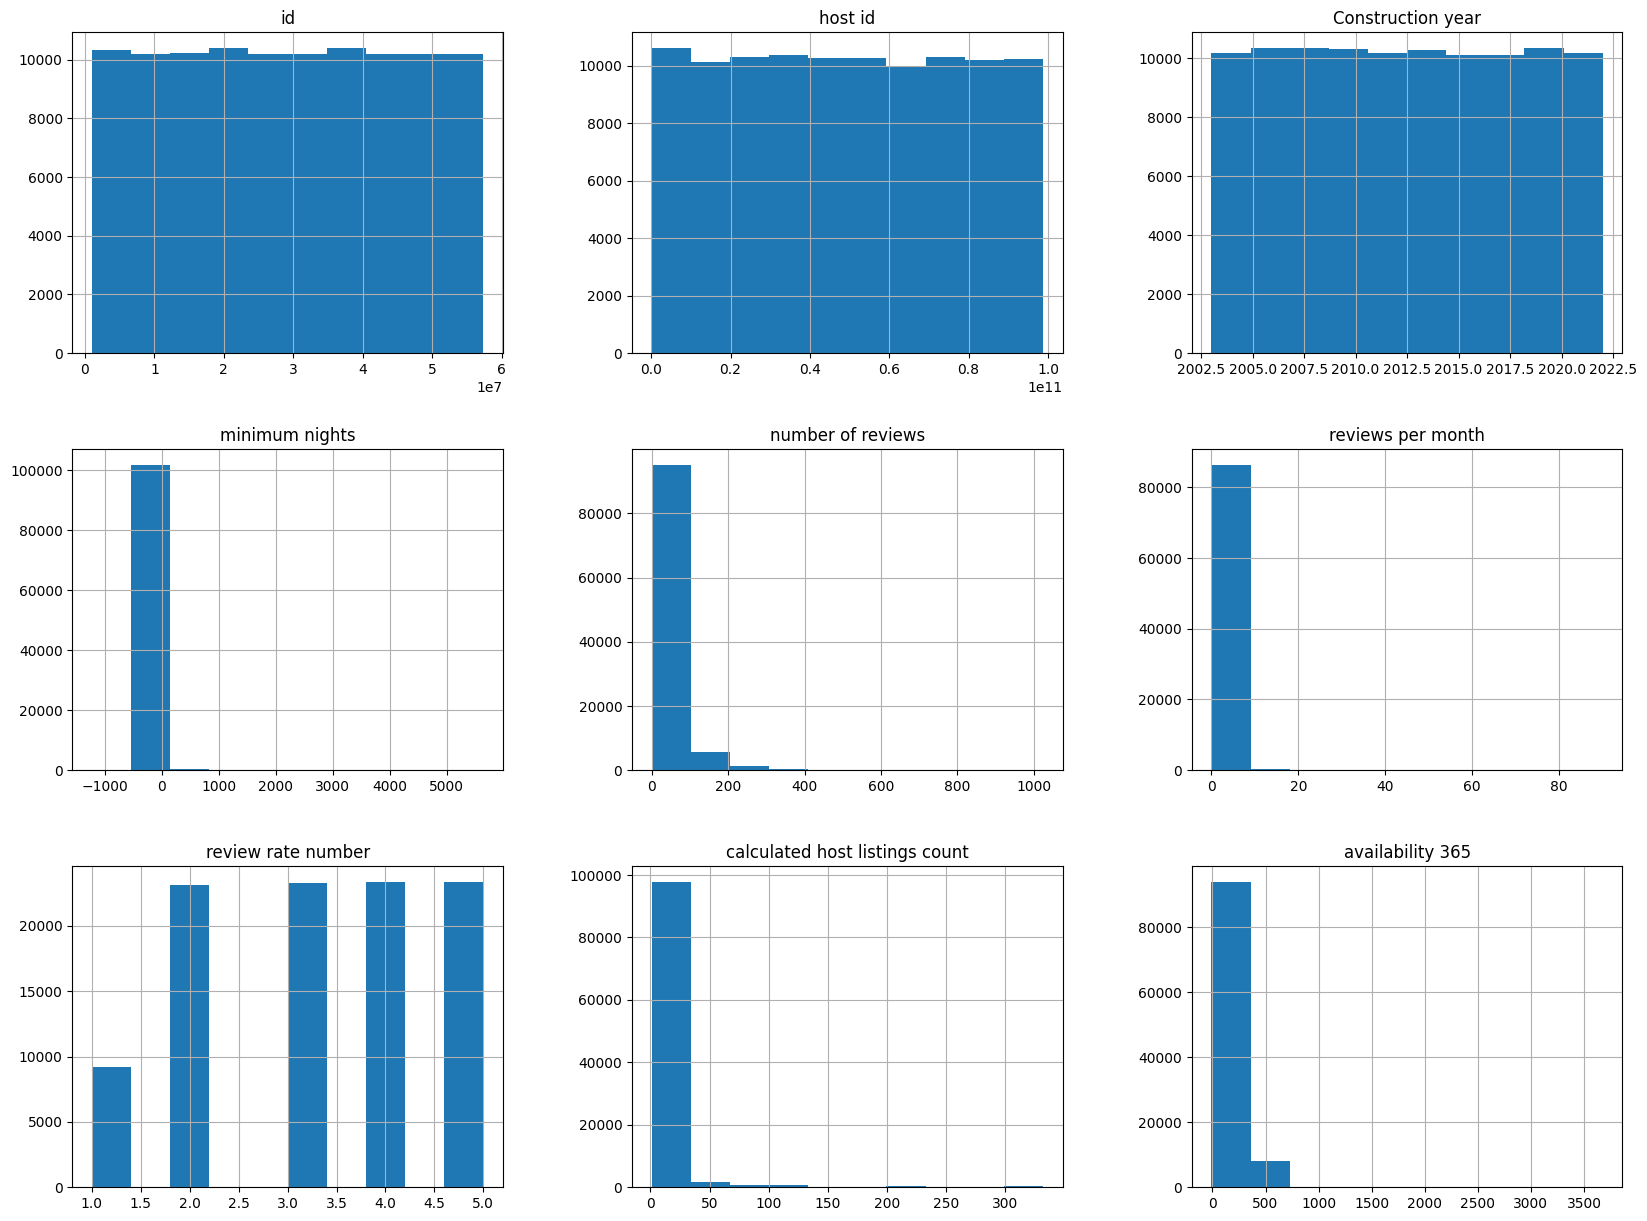

In [ ]:
df.hist(figsize=(20,15))

➡️ También se puede analizar cada variable de manera independiente. En este gráfico se muestra el histograma de la variable "number of reviews" que muestra el diferente número de reseñas en la mayoria de las propiedades, monstrando que 80000 propiedades no cuentan con ninguna reseña:

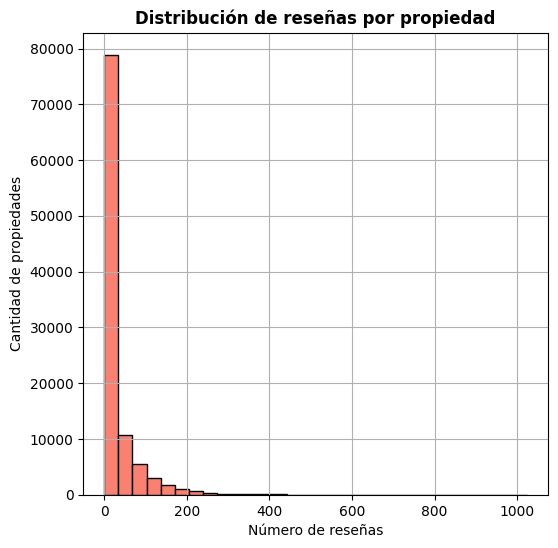

In [ ]:
df['number of reviews'].hist(figsize=(6,6), bins=30, color='salmon', edgecolor='black')
plt.xlabel('Número de reseñas')
plt.ylabel('Cantidad de propiedades')
plt.title('Distribución de reseñas por propiedad', fontweight="bold")
plt.show()

➡️ En este histograma se aprecia la distribución de la variable rrn (Número de calificación de revisión):

<function matplotlib.pyplot.show(close=None, block=None)>

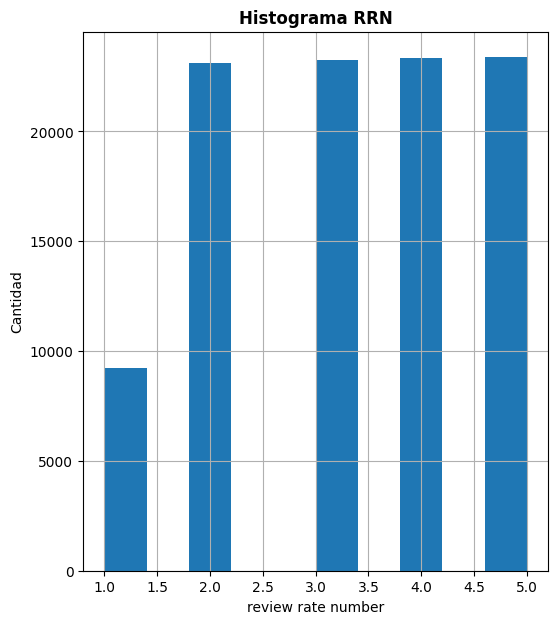

In [ ]:
df['review rate number'].hist(figsize = (6,7))
plt.xlabel('review rate number')
plt.ylabel('Cantidad')
plt.title('Histograma RRN', fontweight = "bold")
plt.show

➡️ Para visualizar la relación entre dos variables numéricas se utiliza un gráfico de líneas. Este combina las variables de tipo de cuarto y rrn. Como tenemos variables que representan categoria (private room, entire home/apt, shared, hotel room) se puede realizar un análisis en el tiempo para ver su comportamiento. Los RB&B con menos calificación teniendo 3.3 vendrian a ser los private room y los de más alta los hotel room con 3.7:

<Axes: xlabel='room type', ylabel='review rate number'>

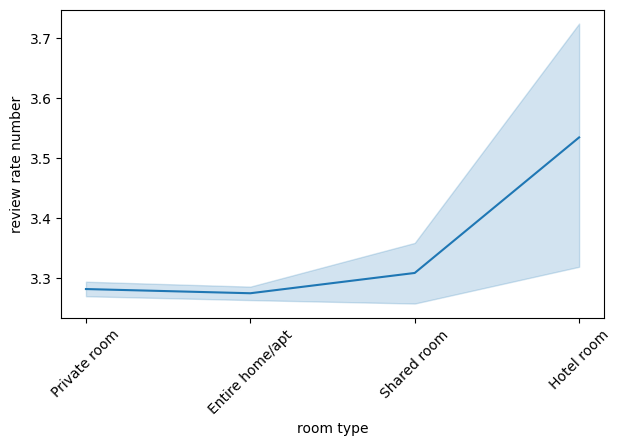

In [ ]:
fig = plt.figure(figsize=(7,4), dpi=100)
plt.xticks(rotation = 45, fontsize=10)
sns.lineplot(data=df, x = 'room type', y = 'review rate number')

➡️ Ahora hacemos lo mismo, pero con el número de semana de año review rate number:

<Axes: xlabel='Construction year', ylabel='review rate number'>

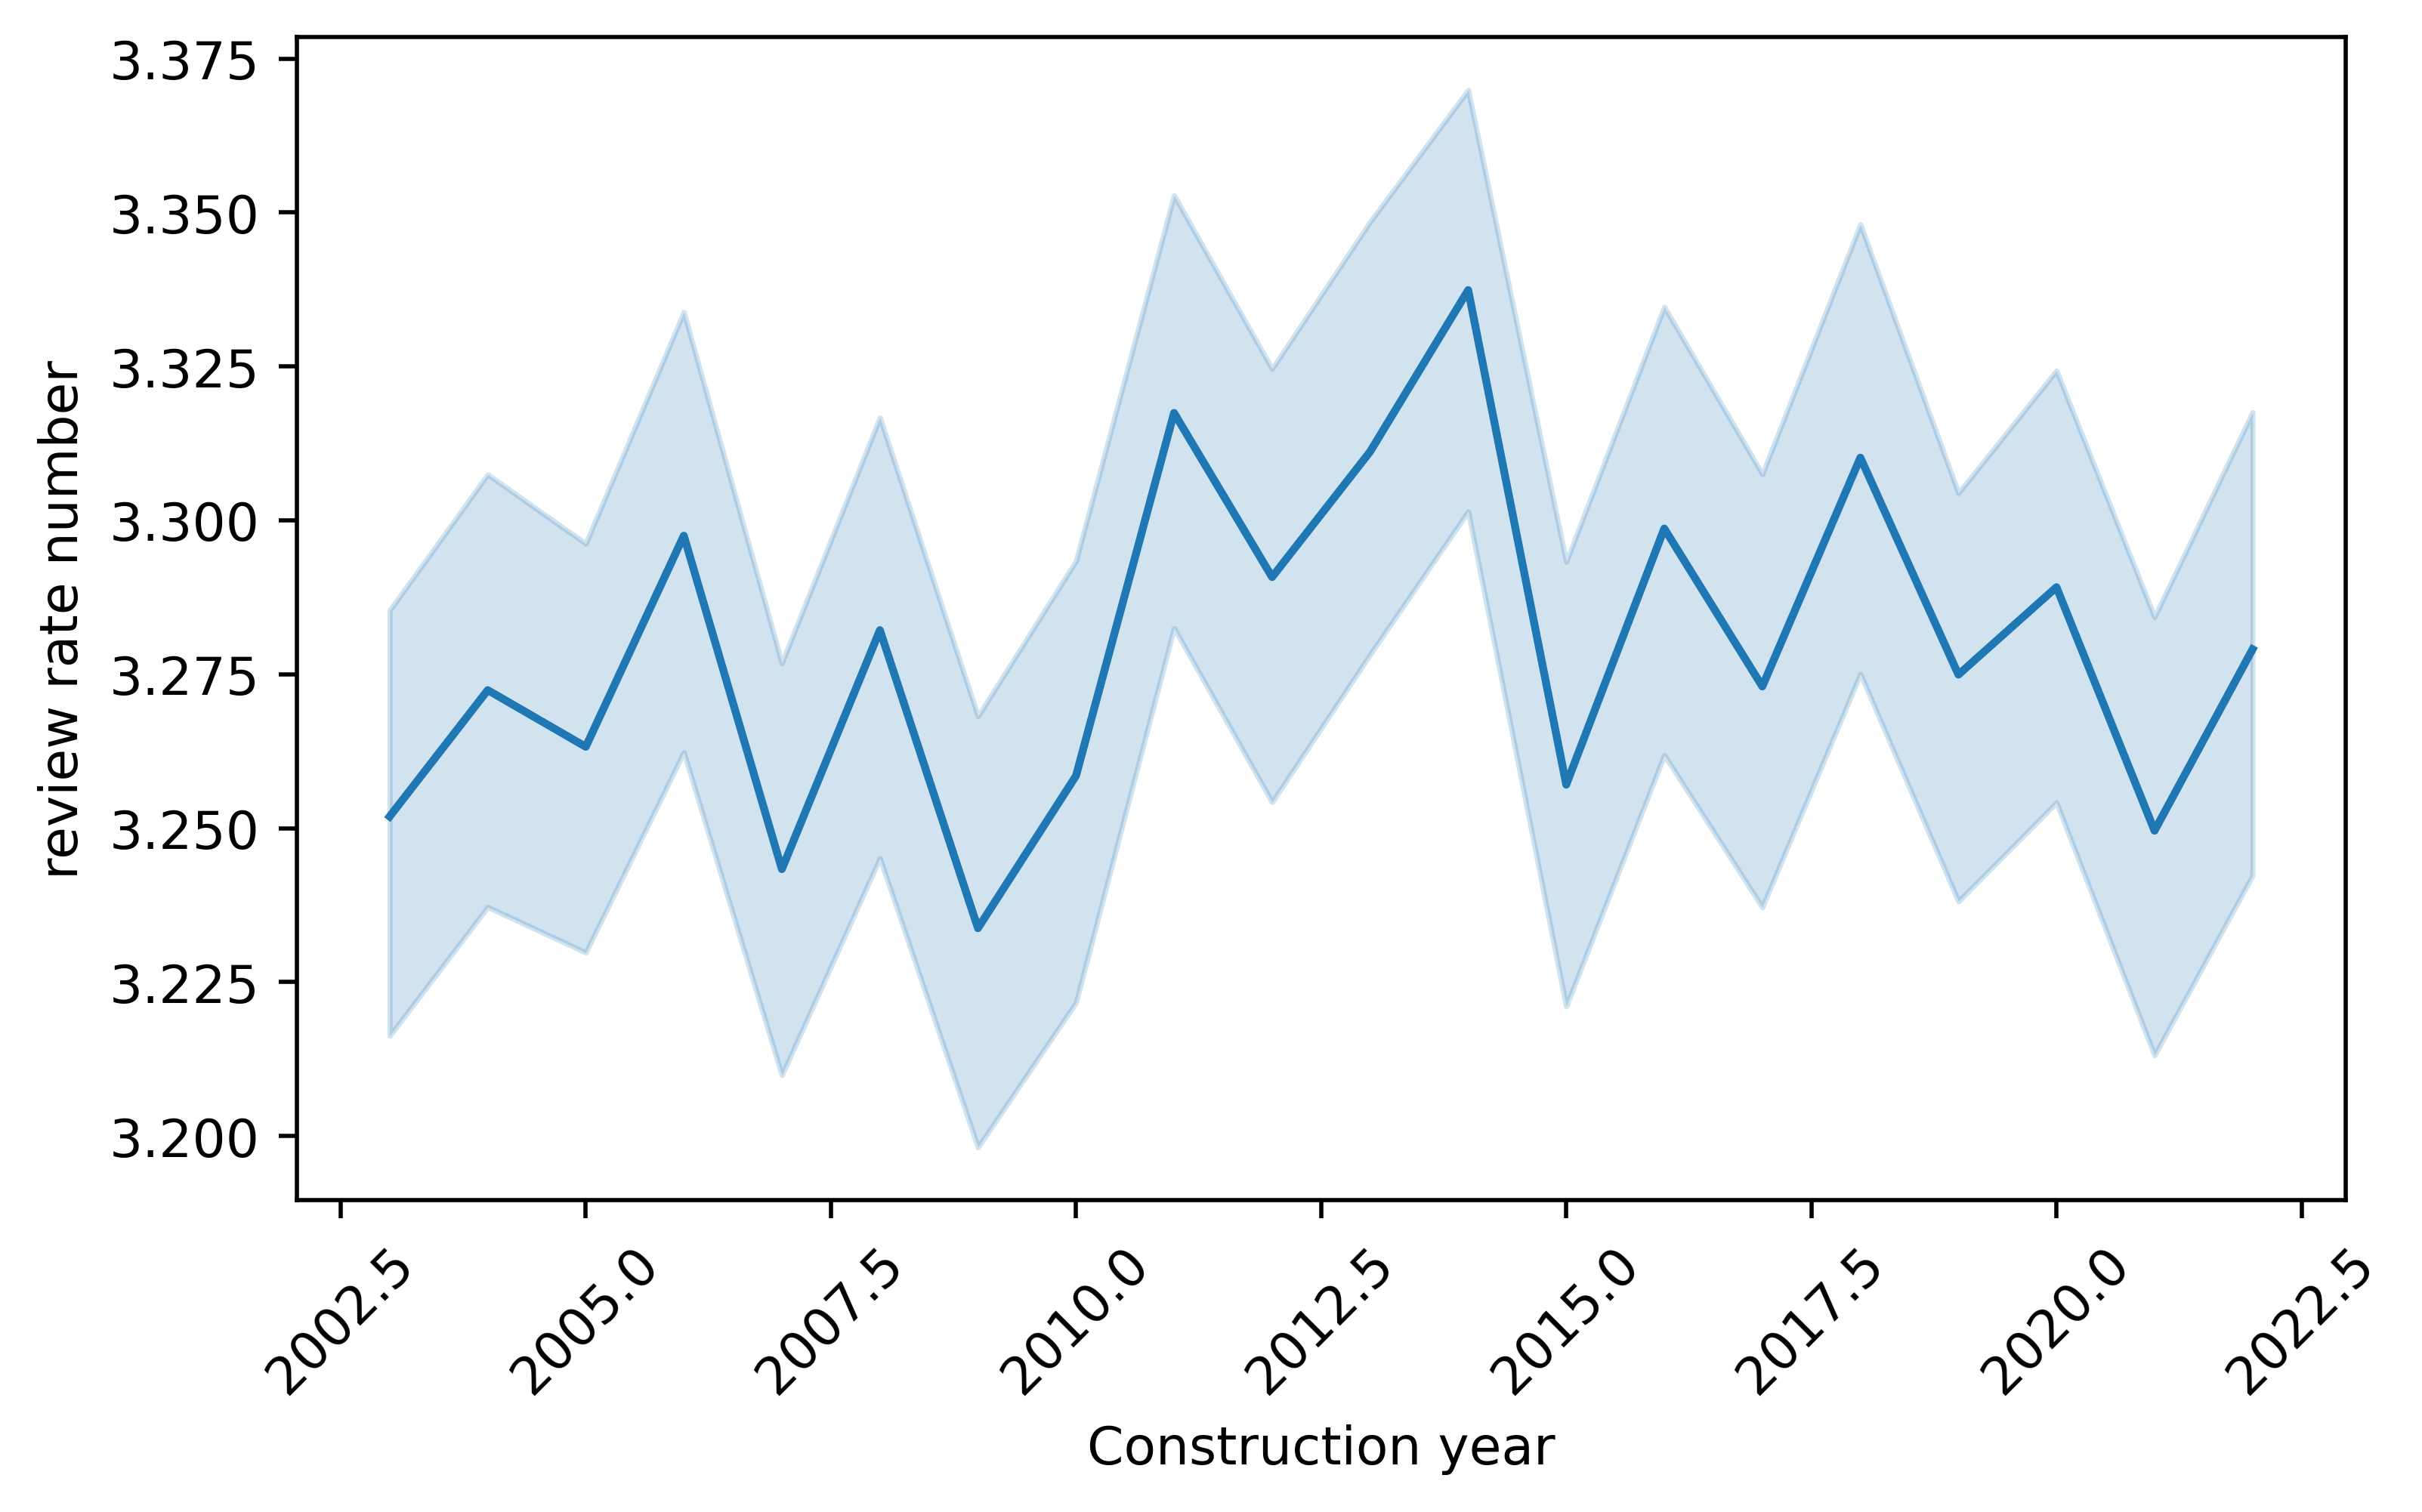

In [ ]:
fig = plt.figure(figsize=(7,4), dpi=500)
plt.xticks(rotation = 45, fontsize=10)
sns.lineplot(data=df, x = 'Construction year', y = 'review rate number')

**10.2. Análisis de variables categóricas:**
Para analizar las variables categóricas, seleccionamos primero el subconjunto del dataframe y visualizamos los valores de cada categoría. Identificamos algún valor que no corresponda con el negocio.

Seleccionar las variables categóricas:

In [ ]:
df_cat = df.select_dtypes(include=['object'])
df_cat.head()

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,price,service fee,last review,house_rules,license
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,4.064.749,-7.397.237,United States,US,False,strict,Private room,$966,$193,10/19/2021,Clean up and treat the home the way you'd like...,NaN
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,4.075.362,-7.398.377,United States,US,False,moderate,Entire home/apt,$142,$28,5/21/2022,Pet friendly but please confirm with me if the...,NaN
2,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,4.080.902,-739.419,United States,US,True,flexible,Private room,$620,$124,NaN,"I encourage you to use my kitchen, cooking and...",NaN
3,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,4.068.514,-7.395.976,United States,US,True,moderate,Entire home/apt,$368,$74,7/5/2019,NaN,NaN
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,4.079.851,-7.394.399,United States,US,False,moderate,Entire home/apt,$204,$41,11/19/2018,"Please no smoking in the house, porch or on th...",NaN


➡️ Visualizar los valores de cada una de las variables:

Esto nos ayuda a identificar valores que no coinciden con el dominio del negocio, de ser así, lo eliminaríamos.

In [ ]:
for col in df_cat.columns:
  print(f"{col}: \n{df_cat[col].unique()}\n")

NAME: 
['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' ...
 'Elmhurst 1st Fl Rightl Bedroom'
 'Elmhurst 1st Floor BR w/ Pvt. Bath&Balcony'
 'Parisian Style Apartment in Heart of Brooklyn']

host_identity_verified: 
['unconfirmed' 'verified' nan]

host name: 
['Madaline' 'Jenna' 'Elise' ... 'Anna B' 'Natalie And Dan' 'Apostle John']

neighbourhood group: 
['Brooklyn' 'Manhattan' 'brookln' 'manhatan' 'Queens' nan 'Staten Island'
 'Bronx']

neighbourhood: 
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn He

➡️ Ahora, utilizando gráficos se observa la proporción entre las distintas categorías.

 cantidad de reseñas con mayor valoración:

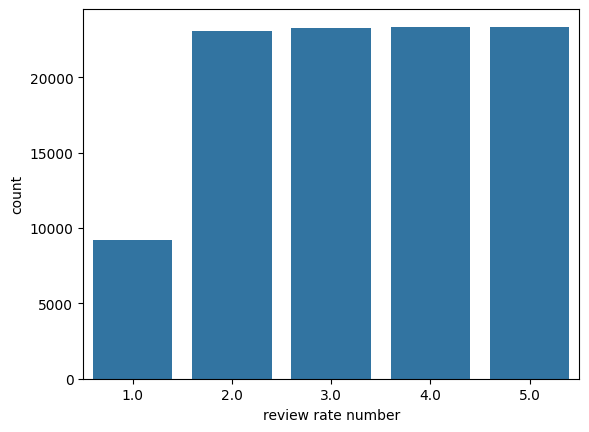

In [ ]:
sns.countplot(data=df, x = 'review rate number')
plt.show()

➡️ cantidad de Tipos de cuartos reservados:

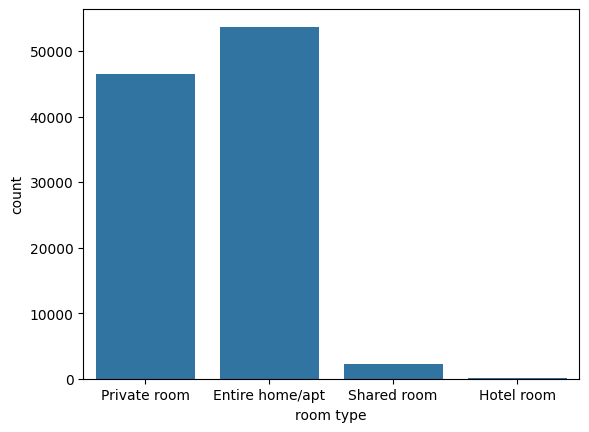

In [ ]:
sns.countplot(data=df, x = 'room type')
plt.show()

Observamos que la habitacion pivada es la que más se ha reservado.
➡️ Por dónde se realizaron las reservas:

Observamos que la mayoría de las reseñas tienen puntuaciones altas (4-5 estrellas), y el tipo de habitación más común es [Casa entera o Habitación privada, según muestra el gráfico] :

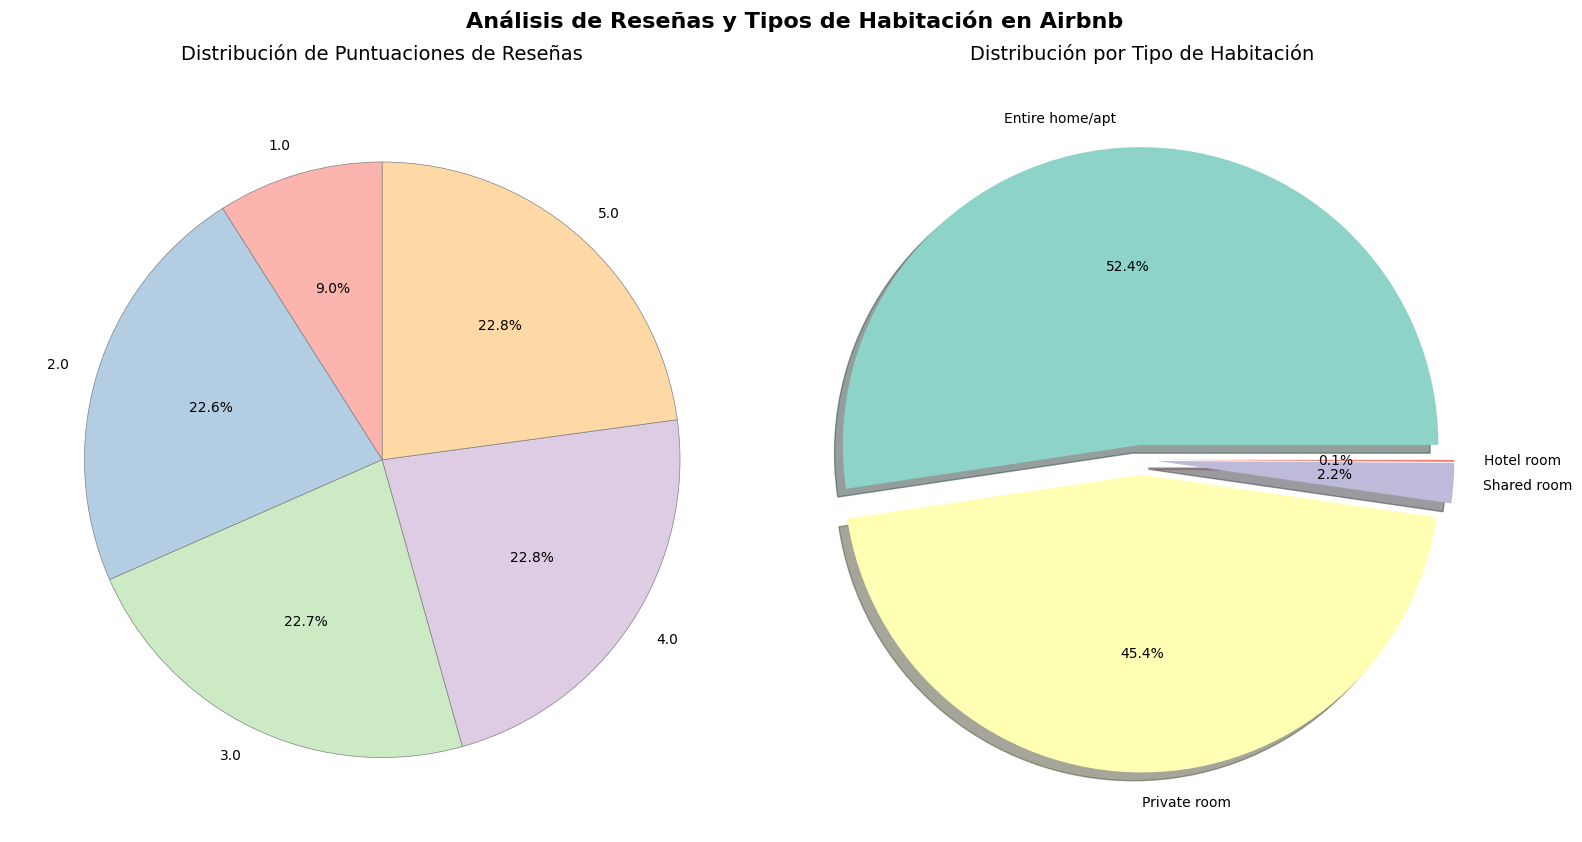

In [ ]:
# Filtrar datos relevantes (ej: solo reseñas con puntuación válida)
df_reviews = df.dropna(subset=['review rate number', 'room type'])

# Configurar la figura
fig = plt.figure(figsize=(16, 9))

# --- Gráfico 1: Distribución de 'review rate number' ---
ax1 = fig.add_subplot(121)
review_counts = df_reviews['review rate number'].value_counts().sort_index()
ax1.set_title('Distribución de Puntuaciones de Reseñas', fontsize=14, pad=20)
ax1.pie(
    x=review_counts,
    labels=review_counts.index,
    autopct='%.1f%%',
    colors=plt.cm.Pastel1.colors,  # Paleta de colores suaves
    startangle=90,
    wedgeprops={'edgecolor': 'gray', 'linewidth': 0.5}
)

# --- Gráfico 2: Distribución por 'room type' ---
ax2 = fig.add_subplot(122)
room_type_counts = df_reviews['room type'].value_counts()
ax2.set_title('Distribución por Tipo de Habitación', fontsize=14, pad=20)
ax2.pie(
    x=room_type_counts,
    labels=room_type_counts.index,
    autopct='%.1f%%',
    colors=plt.cm.Set3.colors,  # Paleta diferente para distinguir
    explode=[0.05] * len(room_type_counts),  # Separar ligeramente las porciones
    shadow=True,
    textprops={'fontsize': 10}
)

# Ajustes generales
plt.suptitle('Análisis de Reseñas y Tipos de Habitación en Airbnb', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

**Paso 11. Combinando variables:**
Después de analizar las variables de manera individual para comprender su comportamiento, se pueden encontrar relaciones interesantes entres dos, tres o cuatro variables. A continuación se responden algunas preguntas interesantes:

➡️ ¿Qué tipo de hotel tiene el mayor número de cancelaciones?

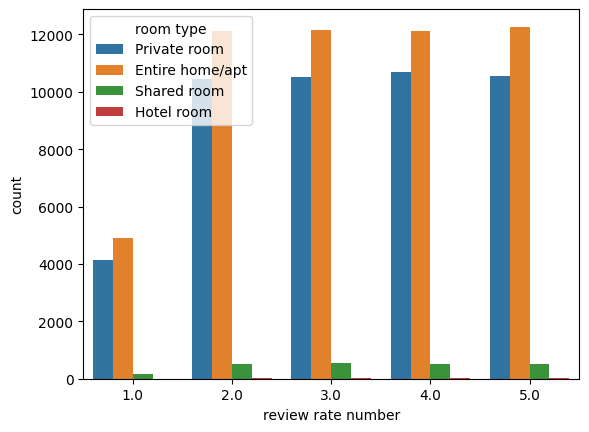

In [ ]:
sns.countplot(data=df, x = 'review rate number', hue='room type')
plt.show()

**Paso 12. Limpieza de datos:**
Resolveremos problemas de calidad
➡️ Resolver problema de datos faltantes, observemos qué variables tienen datos faltantes y qué se puede hacer en cada caso:

In [ ]:
print(df.isnull().sum())

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [ ]:
df[["NAME", "host_identity_verified", "host name", "neighbourhood group", "neighbourhood","lat","long","country","country code","instant_bookable","cancellation_policy","Construction year","price","service fee","minimum nights","number of reviews","last review","reviews per month","review rate number","calculated host listings count","availability 365","house_rules","license"]].describe(include="all")

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
count,102349,102310,102193,102570,102583,102591,102591,102067,102468,102494,...,102326,102190.000000,102416.000000,86706,86720.000000,102273.000000,102280.000000,102151.000000,50468,2
unique,61279,2,13189,7,224,21991,17774,1,1,2,...,231,NaN,NaN,2477,NaN,NaN,NaN,NaN,1969,1
top,Home away from home,unconfirmed,Michael,Manhattan,Bedford-Stuyvesant,4.076.411,-7.399.371,United States,US,False,...,$41,NaN,NaN,6/23/2019,NaN,NaN,NaN,NaN,#NAME?,41662/AL
freq,33,51200,881,43792,7937,36,44,102067,102468,51474,...,526,NaN,NaN,2443,NaN,NaN,NaN,NaN,2712,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.135845,27.483743,NaN,1.374022,3.279106,7.936605,141.133254,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,30.553781,49.508954,NaN,1.746621,1.284657,32.218780,135.435024,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-1223.000000,0.000000,NaN,0.010000,1.000000,1.000000,-10.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.000000,1.000000,NaN,0.220000,2.000000,1.000000,3.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.000000,7.000000,NaN,0.740000,3.000000,1.000000,96.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.000000,30.000000,NaN,2.000000,4.000000,2.000000,269.000000,NaN,NaN


In [ ]:
df1 = df.dropna (subset=["NAME", "host_identity_verified", "host name", "neighbourhood group", "neighbourhood","lat","long","country","country code","instant_bookable","cancellation_policy","Construction year","price","service fee","minimum nights","number of reviews","last review","reviews per month","review rate number","calculated host listings count","availability 365","house_rules","license"], axis = 0)
print(df1.isnull().sum())

id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
house_rules                       0
license                           0
dtype: int64


In [ ]:
print(df1.isnull().sum())

id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
house_rules                       0
license                           0
dtype: int64


**Paso 13. Tipos de datos:**
Las columnastiene como tipo de dato float, pero debería ser int, entonces procedemos a cambiarle su tipo de dato, lo mismo hacemos para la columna reservation_status_date lo cambiamos de tipo object a DateTime:

In [ ]:
# Columnas monetarias
df["price"] = (
    df["price"]
    .str.replace("[$,]", "", regex=True)  # Eliminar "$" y comas con una sola operación
    .replace("", pd.NA)                   # Convertir cadenas vacías a NaN
    .astype(float)
)

df["service fee"] = (
    df["service fee"]
    .str.replace("[$,]", "", regex=True)
    .replace("", pd.NA)
    .astype(float)
)

# Columnas categóricas
df["host_identity_verified"] = df["host_identity_verified"].astype("category")
df["license"] = df["license"].astype("category")

# Columnas numéricas enteras
df["Construction year"] = df["Construction year"].fillna(0).astype(int)
df["minimum nights"] = df["minimum nights"].fillna(0).astype(int)
df["number of reviews"] = df["number of reviews"].fillna(0).astype(int)

# Coordenadas geográficas
df["lat"] = (
    df["lat"]
    .astype(str)
    .str.replace(".", "", regex=False)    # Eliminar puntos incorrectos (ej: 4.064.749 -> 4064749)
    .str.replace(",", ".")                # Reemplazar comas por puntos para decimales
    .astype(float)
)

df["long"] = (
    df["long"]
    .astype(str)
    .str.replace(".", "", regex=False)
    .str.replace(",", ".")
    .astype(float)
)

# Fechas
df["last review"] = pd.to_datetime(df["last review"], errors="coerce")

# Verificar cambios
df.dtypes

,0
id,int64
NAME,object
host id,int64
host_identity_verified,category
host name,object
neighbourhood group,object
neighbourhood,object
lat,float64
long,float64
country,object


**Paso 14. Datos inconsistentes:**


Al analizar las caracteristicas de la columna de minimum nights con valores negativos.
No puede haber valores negativos en numero de noches.
Estos registros se deben eliminar:

In [ ]:
# Filtrar valores negativos en "minimum nights"
df = df[df["minimum nights"] >= 0]

negativos = (df["minimum nights"] < 0).sum()
print("Número de valores negativos por noche:",  negativos)

Número de valores negativos por noche: 0


**Tambien** renombrar las columnas para que no tengan espacios

In [ ]:
# Reemplazar espacios por "_" y convertir a minúsculas
df.columns = df.columns.str.replace(" ", "_").str.lower()

**Paso 15. Datos atípicos:**
Se comienza con la detección de outliers visualizando los boxplot de las diferentes variables que conforman nuestro modelo. De su visualización obtenemos un total de 8 variables que presentan cierta problemática: ‘lead time’, ‘stays in weekend nights’, ‘stays in week nights, ‘adults’, “babies’, ‘required car parking spaces’, ‘adr, ‘previous cancellations’.

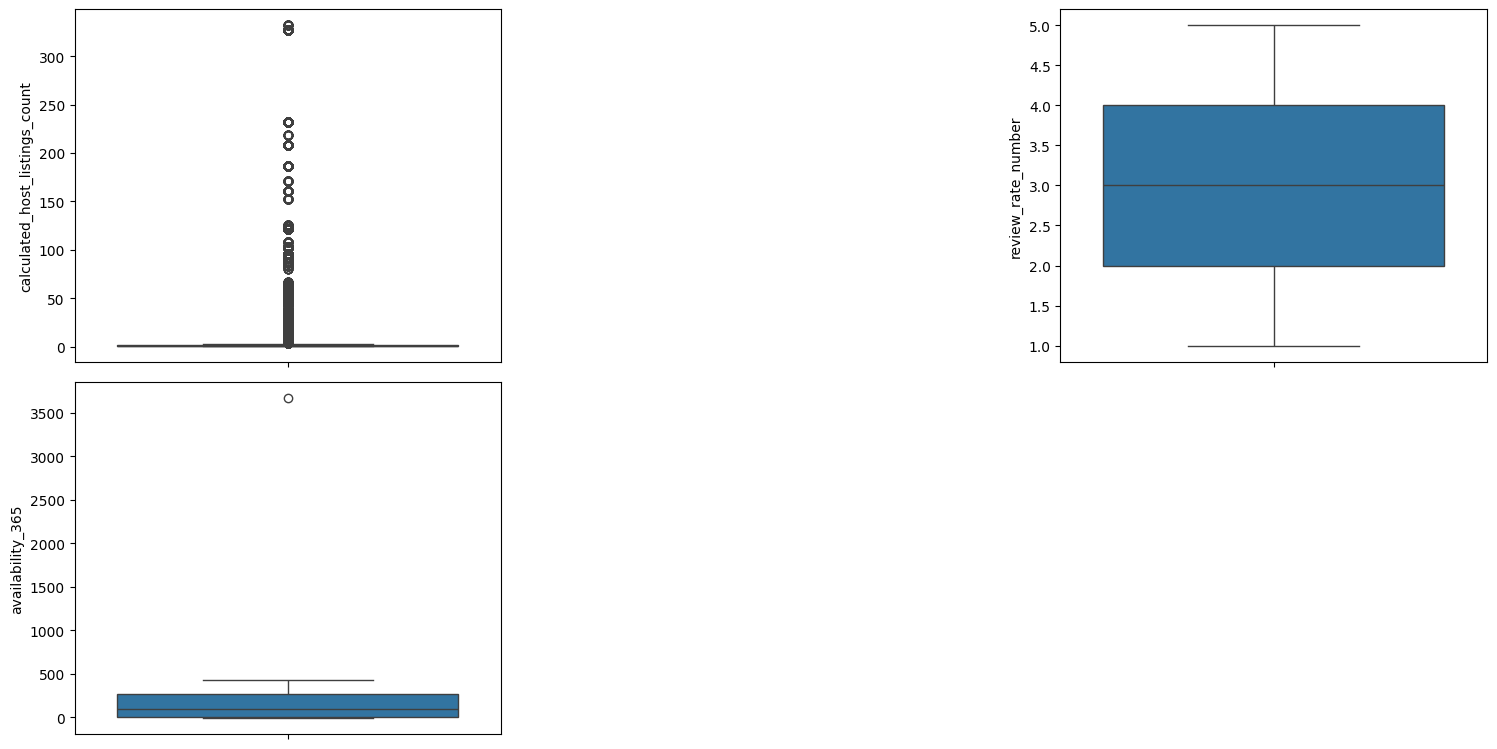

In [ ]:
columnas = ['calculated_host_listings_count', "review_rate_number", "availability_365"]
n = 1
plt.figure(figsize = (20, 15))

for column in columnas:
  plt.subplot(4, 4, n)
  n = n + 2
  sns.boxplot (y=df[column])
  plt.tight_layout()

➡️ Se procede a sustituir la mayoria de los valores atípicos por otros dentro del último cuartil o por el valor cero dependiendo del caso.

In [ ]:
# Función para eliminar outliers usando el método IQR
def eliminar_outliers_iqr(df, columnas):
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]
    return df

# Columnas numéricas que tienen outliers según tu gráfico
columnas_con_outliers = [
    'minimum_nights',
                'number_of_reviews',
                'calculated_host_listings_count',
                'availability_365',
                'review_rate_number',
                'price',
                'service_fee'
]

# Aplicar limpieza
df_limpio = eliminar_outliers_iqr(df, columnas_con_outliers)

# Verificar el cambio
print(f"Número de filas original: {len(df)}")
print(f"Número de filas sin outliers: {len(df_limpio)}")


Número de filas original: 102586
Número de filas sin outliers: 66134


**Paso 16. Datos redundantes:**
Para identificar los atributos redundantes se pueden utilizar la matriz de correlación e indentificar correlaciones entre atributos.
La matriz de correlación solo se calcula sobre atributos numéricos.

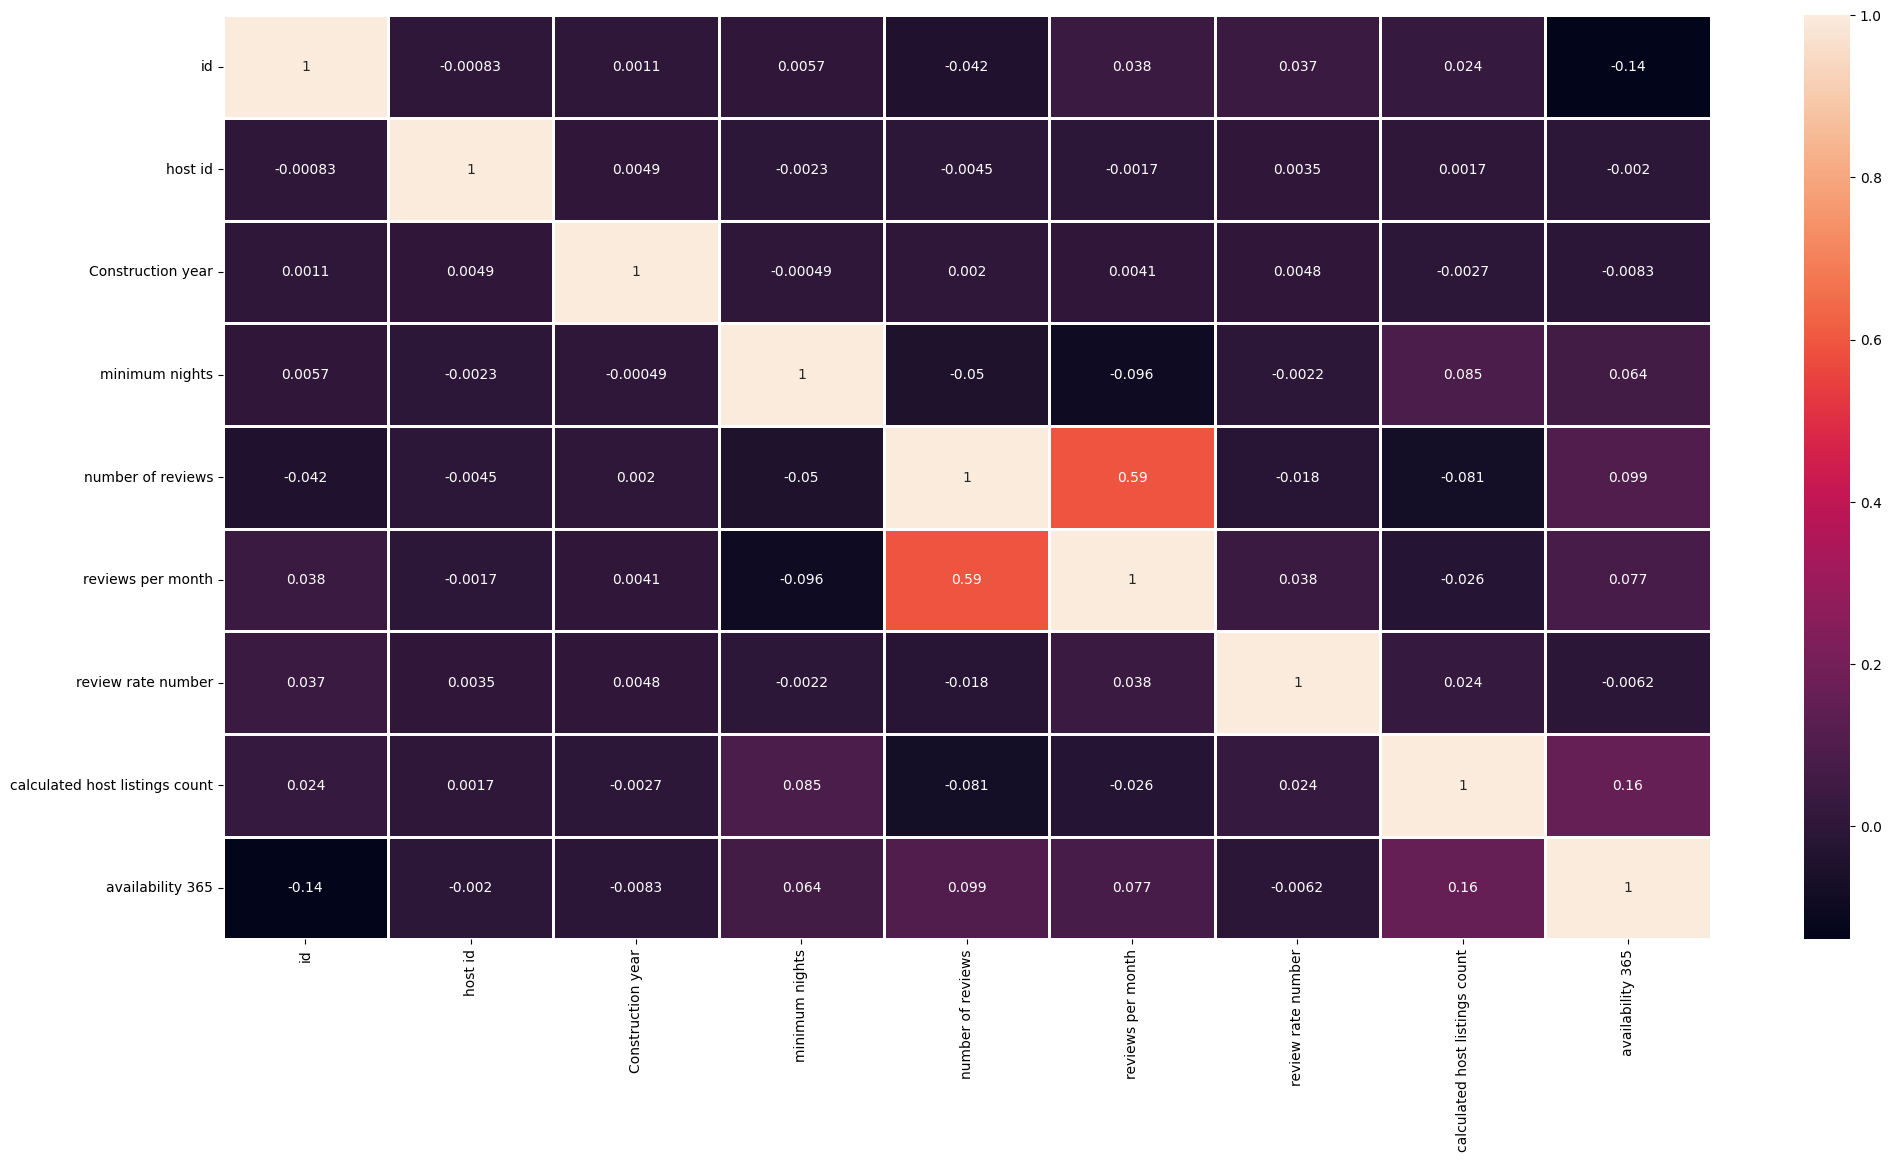

In [ ]:
plt.figure(figsize = (24, 12))
# Select only numeric features for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

**Paso 17. Datos duplicados:**
El anális de datos duplicados en este conjunto es interesante.

Existen muchas filas duplicadas, sin embargo en algunos casos pudieran ser coincidencias de reservas iguales, para clientes diferentes.
En este caso es mejor indagar un poco en el negocio para saber cual es realmente la posibilidad de reservas identicas.
En último recursos, si se eliminan todos los duplicados, quedarían aún suficientes datos para realizar un análisis interesante.

In [ ]:
#Contando los duplicados de todo el dataframe:
df.duplicated().sum()

np.int64(541)

In [ ]:
#Permite ver las filas duplicadas de todo el dataframe
df.loc[df.duplicated(), :]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102058,35506831,Master Bedroom with private Bathroom & Balcony,55110690425,unconfirmed,UZeyir,Queens,Maspeth,4.074.056,-7.390.635,United States,...,$141,1.0,1.0,11/14/2021,0.27,3.0,1.0,339.0,NaN,NaN
102059,35507383,Cozy 2 br in sunny Fort Greene apt,80193772189,verified,Sally,Brooklyn,Fort Greene,4.068.701,-7.397.555,United States,...,$130,3.0,38.0,11/13/2021,0.27,3.0,1.0,0.0,NaN,NaN
102060,35507935,Duplex w/ Terrace @ Box House Hotel,72991962259,verified,The Box House Hotel,Brooklyn,Greenpoint,4.073.756,-739.535,United States,...,$181,3.0,10.0,11/13/2021,0.08,3.0,30.0,32.0,NaN,NaN
102061,35508488,"Cozy, clean Greenpoint room with yard access",74975156081,verified,Dawn,Brooklyn,Greenpoint,4.072.516,-7.395.004,United States,...,$118,30.0,38.0,11/13/2021,0.34,5.0,2.0,324.0,NaN,NaN
102062,35509040,2BR XL Loft: Cleaning CDC guidelines implemented,85844415221,unconfirmed,Vida,Brooklyn,Greenpoint,4.072.732,-7.394.185,United States,...,$71,30.0,13.0,11/13/2021,0.14,4.0,28.0,336.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,4.070.862,-7.394.651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,408.046,-7.396.545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,4.067.505,-7.398.045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,4.074.989,-7.393.777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [ ]:
#Si se quisiera eliminar los duplicados
df_drop = df.drop_duplicates()
df_drop.shape

(102058, 26)

**Paso 18. Transformaciones a los datos:** Las transformaciones que se van a aplicar a continuación dependen de la técnica analitica a aplicar.

**18.1 Normalizacion:**


In [ ]:
# Crear copia del dataframe original
df_normalize = df.copy()

# Elegir columnas numéricas a normalizar (puedes ajustar esta lista)
columns_to_normalize = ['price', 'service_fee', 'minimum_nights',
                        'number_of_reviews', 'reviews_per_month',
                        'review_rate_number', 'calculated_host_listings_count',
                        'availability_365']

# Eliminar filas con NaN en esas columnas
df_normalize = df_normalize.dropna(subset=columns_to_normalize)


# Normalizar con MinMaxScaler
scaler = MinMaxScaler()
df_normalize[columns_to_normalize] = scaler.fit_transform(df_normalize[columns_to_normalize])

# Mostrar los últimos 10 registros normalizados
df_normalize[columns_to_normalize].tail(10)


,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
102582,0.405217,0.404348,0.001240,0.047852,0.011112,0.25,0.000000,0.117982
102584,0.448696,0.447826,0.000354,0.086914,0.020113,0.25,0.000000,0.109574
102585,0.515652,0.517391,0.000886,0.003906,0.000778,1.00,0.000000,0.045294
102586,0.137391,0.139130,0.000709,0.007812,0.001778,1.00,0.000000,0.045837
102587,0.293913,0.295652,0.000177,0.064453,0.014891,0.25,0.000000,0.098183
102588,0.493913,0.495652,0.000177,0.172852,0.041894,0.75,0.000000,0.113914
102591,0.946957,0.947826,0.000886,0.016602,0.003778,1.00,0.000000,0.039056
102593,0.912174,0.913043,0.000177,0.007812,0.001667,0.75,0.003021,0.043938
102595,0.684348,0.682609,0.000177,0.000977,0.000111,0.25,0.003021,0.109845
102597,0.431304,0.430435,0.000354,0.004883,0.001000,0.50,0.000000,0.107404


**18.2 Discretizacion:** Discretización de price en 3 categorías

In [ ]:
# Discretizar automáticamente en 3 grupos con igual cantidad de registros
df['price_quantile'] = pd.qcut(df['price'], q=3, labels=['Bajo', 'Medio', 'Alto'])

# Mostrar resultados
df[['price', 'price_quantile']].head(10)


,price,price_quantile
0,966.0,Alto
1,142.0,Bajo
2,620.0,Medio
3,368.0,Bajo
4,204.0,Bajo
5,577.0,Medio
6,71.0,Bajo
7,1060.0,Alto
8,1018.0,Alto
9,291.0,Bajo


**Paso 19.Numerizacion:**

In [ ]:
# Reemplazar espacios por "_" y convertir a minúsculas
df.columns = df.columns.str.replace(" ", "_").str.lower()

# Numerizar 1 a 1
df['host_identity_verified'] = df['host_identity_verified'].map({'unconfirmed': 0, 'verified': 1})
df['cancellation_policy'] = df['cancellation_policy'].map({'strict': 1, 'moderate': 2, 'flexible': 3})
df['room_type'] = df['room_type'].map({'Private room': 0, 'Entire home/apt': 1,
                                                'Shared room': 2, 'Hotel room': 3})

df.head()


,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license,price_quantile
0,1001254,Clean & quiet apt home by the park,80014485718,0,Madaline,Brooklyn,Kensington,4064749.0,-7397237.0,United States,...,10,9,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN,Alto
1,1002102,Skylit Midtown Castle,52335172823,1,Jenna,Manhattan,Midtown,4075362.0,-7398377.0,United States,...,30,45,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN,Bajo
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,4080902.0,-739419.0,United States,...,3,0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN,Medio
3,1002755,NaN,85098326012,0,Garry,Brooklyn,Clinton Hill,4068514.0,-7395976.0,United States,...,30,270,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN,Bajo
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,1,Lyndon,Manhattan,East Harlem,4079851.0,-7394399.0,United States,...,10,9,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN,Bajo


**Paso 20.Técnicas de muestreo:**
Si el objetivo fuera predecir la variable review_rate_number se deberia analizar el balance de cada una de las clases, a continuación se muestran en un gráficos:

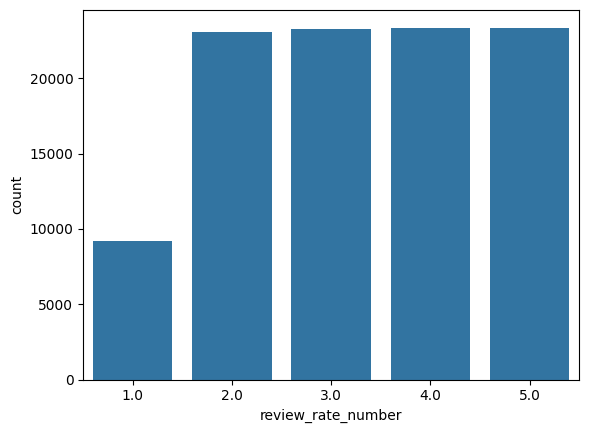

In [ ]:
sns.countplot(data=df, x = 'review_rate_number')
plt.show()

In [ ]:
from sklearn.utils import resample

# Obtener el conteo de cada clase en 'review_rate_number'
class_counts = df["review_rate_number"].value_counts()

# Excluir clases con 0 muestras (ej: 1.0 según la imagen)
valid_classes = class_counts[class_counts > 0]
min_samples = valid_classes.min()  # Tamaño de la clase más pequeña

# Lista para almacenar los dataframes balanceados
dfs_balanced = []

# Balancear cada clase
for class_label in valid_classes.index:
    df_class = df[df["review_rate_number"] == class_label]

    # Submuestrear si la clase tiene más muestras que el mínimo
    if len(df_class) > min_samples:
        df_class = resample(df_class,
                             replace=False,
                             n_samples=min_samples,
                             random_state=27)
    dfs_balanced.append(df_class)

# Combinar todas las clases balanceadas
df_balanced = pd.concat(dfs_balanced)

# Opcional: Mezclar el dataset para evitar patrones secuenciales
df_balanced = df_balanced.sample(frac=1, random_state=27).reset_index(drop=True)

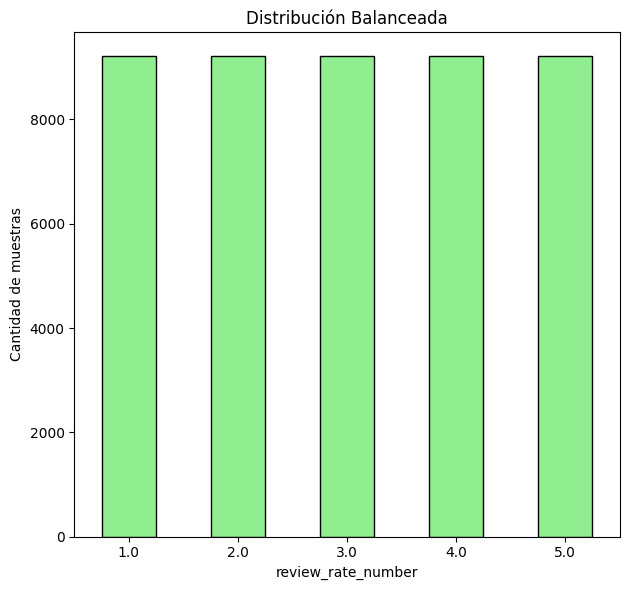

In [ ]:
# 2. Conteo después del balanceo (usando df_balanced del código anterior)
balanced_counts = df_balanced["review_rate_number"].value_counts().sort_index()

# 3. Configurar el gráfico
plt.figure(figsize=(12, 6))

# Gráfico balanceado (después)
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
balanced_counts.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Distribución Balanceada")
plt.xlabel("review_rate_number")
plt.ylabel("Cantidad de muestras")
plt.xticks(rotation=0)

plt.tight_layout()  # Ajustar espaciado
plt.show()